D# Homework 3 Solutions
# Part A: Predicting Listening Behavior on a Music Streaming Platform

In [1]:
import numpy as np
import pickle
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline

In [2]:
# Loading the data
X,y = pickle.load(open('listens.p','rb'))

###  A.1: Data Exploration

In [3]:
# Number of users (rows)
print(X.shape[0])

# Number of songs (columns)
print(X.shape[1])

# Maximum number of times that a user has listened to one song (max entry of X)
print(np.max(X))

# Percentage of users that have listened to the special song (mean of y)
print(np.mean(y))

# Smallest number of times each song has been listened to (sum of each column)
print(np.min(np.sum(X,axis=0)))

# Largest number of times each song has been listened to (sum of each column)
print(np.max(np.sum(X,axis=0)))

# Average number of times each song has been listened to (sum of each column)
print(np.mean(np.sum(X,axis=0)))

# Smallest number of users that have listened to a song (counting non-zero values in each column)
print(np.min(np.sum(X>0,axis=0)))

# Largest number of users that have listened to a song (counting non-zero values in each column)
print(np.max(np.sum(X>0,axis=0)))

# Average number of users that have listened to a song (counting non-zero values in each column)
print(np.mean(np.sum(X>0,axis=0)))

# Smallest number of listens by each user (sum of each row)
print(np.min(np.sum(X,axis=1)))

# Largest number of listens by each user (sum of each row)
print(np.max(np.sum(X,axis=1)))

# Average number of listens by each user (sum of each row)
print(np.mean(np.sum(X,axis=1)))

# Smallest number of songs listened to by a user (counting non-zero values in each row)
print(np.min(np.sum(X>0,axis=1)))

# Largest number of songs listened to by a user (counting non-zero values in each row)
print(np.max(np.sum(X>0,axis=1)))

# Average number of songs listened to by a user (counting non-zero values in each row)
print(np.mean(np.sum(X>0,axis=1)))

1960
990
214.0
0.16326530612244897
6.0
688.0
61.607070707070704
6
340
32.07878787878788
2.0
293.0
31.117857142857144
2
138
16.203061224489797


### A.2: Baseline (No data pre-processing)

In [4]:
# Forming train/test splits
X_train = X[:1400]
X_test = X[1400:]
y_train = y[:1400]
y_test = y[1400:]

In [5]:
# Random Forest
clf = RandomForestClassifier()
clf.fit(X_train,y_train)
y_pred = clf.predict_proba(X_test)[:,1]
print(roc_auc_score(y_test,y_pred))

0.7972323038899156


In [6]:
# kNN
gs = GridSearchCV(KNeighborsClassifier(),
                  param_grid={'n_neighbors':[1,2,4,8,16,32,64],
                              'metric':['euclidean','manhattan','hamming']},
                  cv=5,
                  scoring='roc_auc')
gs.fit(X_train,y_train)
print(gs.best_params_)

clf = gs.best_estimator_
y_pred = clf.predict_proba(X_test)[:,1]
print(roc_auc_score(y_test,y_pred))

{'metric': 'manhattan', 'n_neighbors': 32}
0.7730956781189464


### A.3: Column Normalization

In [7]:
# Normalizing the columns
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [8]:
# kNN
gs = GridSearchCV(KNeighborsClassifier(),
                  param_grid={'n_neighbors':[16,32,64,128,256],
                              'metric':['euclidean','manhattan','hamming']},
                  cv=5,
                  scoring='roc_auc')
gs.fit(X_train_scaled,y_train)
print(gs.best_params_)

clf = gs.best_estimator_
y_pred = clf.predict_proba(X_test_scaled)[:,1]
print(roc_auc_score(y_test,y_pred))

{'metric': 'hamming', 'n_neighbors': 128}
0.7821469127830598


### A.4: PCA

In [ ]:
pipe = Pipeline([('pca',PCA()),('knn',KNeighborsClassifier())])

In [ ]:
# kNN
gs = GridSearchCV(pipe,
                  param_grid={'pca__n_components':[8,16,32,64,128],
                              'knn__n_neighbors':[8,16,32,64,128],
                              'knn__metric':['euclidean','manhattan','hamming']},
                  cv=5,
                  scoring='roc_auc',
                  verbose=5)
gs.fit(X_train,y_train)
print(gs.best_params_)

clf = gs.best_estimator_
y_pred = clf.predict_proba(X_test)[:,1]
print(roc_auc_score(y_test,y_pred))

### A.5: PCA and Column Normalization

In [ ]:
# kNN
pipe = Pipeline([('pca',PCA()),('normalize',StandardScaler()),('knn',KNeighborsClassifier())])
gs = GridSearchCV(pipe,
                  param_grid={'pca__n_components':[32,64,128,256,512],
                              'knn__n_neighbors':[16,32,64,128,256],
                              'knn__metric':['euclidean','manhattan']},
                  cv=5,
                  scoring='roc_auc',
                  verbose=5)
gs.fit(X_train,y_train)
print(gs.best_params_)

clf = gs.best_estimator_
y_pred = clf.predict_proba(X_test)[:,1]
print(roc_auc_score(y_test,y_pred))

# Part B: Clustering Stock Returns

In [1]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans, SpectralClustering
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('returns.csv')
df

,symbol,Industry,avg200603,avg200604,avg200605,avg200606,avg200607,avg200608,avg200609,avg200610,...,avg201505,avg201506,avg201507,avg201508,avg201509,avg201510,avg201511,avg201512,avg201601,avg201602
0,A,Health Care,0.039334,0.016401,-0.094683,-0.090490,-0.103653,0.135238,0.016478,0.095077,...,-0.005313,-0.068791,0.052970,-0.112659,-0.027479,0.100233,0.104304,-0.008302,-0.083049,-0.000535
1,AA,Materials,0.040890,0.098826,-0.070155,0.017606,-0.095683,-0.041422,-0.025758,0.031387,...,-0.074074,-0.110845,-0.118750,-0.037678,0.055738,-0.080330,0.045810,0.043340,-0.234244,0.210027
2,AAPL,Information Technology,-0.087448,0.107115,-0.158681,-0.042606,0.179764,0.009372,0.124141,0.078695,...,0.033148,-0.037228,-0.044129,-0.071934,0.001362,0.095627,-0.020695,-0.113600,-0.051360,0.002281
3,ABC,Health Care,0.044538,-0.108473,0.011936,-0.043327,0.024801,0.028526,0.015506,0.039004,...,-0.022238,-0.057353,-0.013250,-0.053995,-0.026243,0.016002,0.011589,0.049272,-0.124621,-0.027943
4,ABT,Health Care,-0.038708,0.017038,-0.001169,0.019183,0.100906,0.026554,-0.005738,0.001319,...,0.040462,0.006356,0.026113,-0.110041,-0.090457,0.110285,0.000891,-0.006855,-0.138598,0.071053
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
428,XRAY,Health Care,0.021091,0.022094,0.003187,0.016759,0.032653,0.052714,-0.074484,0.037786,...,0.017002,-0.014152,0.096109,-0.075661,-0.013076,0.199015,-0.007364,-0.001477,-0.005404,0.042943
429,XRX,Information Technology,0.021474,-0.075660,-0.043898,0.012351,0.025456,0.053265,0.045666,0.095544,...,-0.011255,-0.069930,0.028945,-0.078804,-0.019153,-0.032956,0.118770,0.004726,-0.063401,-0.007231
430,YHOO,Information Technology,0.002794,0.011725,-0.043399,0.033302,-0.174164,0.064254,-0.126984,0.034171,...,0.009166,-0.087340,-0.070705,-0.120807,-0.081931,0.230397,-0.046531,-0.018010,-0.081258,0.086095
431,YUM,Consumer Discretionary,0.024317,0.062228,-0.024382,-0.003371,-0.104267,0.090078,0.059466,0.151553,...,0.041734,0.002448,-0.036769,-0.093935,0.030283,-0.113736,0.016115,-0.002049,0.014722,0.007647


## B.1 Data Exploration

In [5]:
df['Industry'].value_counts()

Industry
Financials                     78
Consumer Discretionary         69
Information Technology         56
Industrials                    55
Health Care                    44
Energy                         38
Consumer Staples               32
Materials                      28
Utilities                      28
Telecommunications Services     5
Name: count, dtype: int64

Index(['avg200801', 'avg200802', 'avg200803', 'avg200804', 'avg200805',
       'avg200806', 'avg200807', 'avg200808', 'avg200809', 'avg200810',
       'avg200811', 'avg200812', 'avg200901', 'avg200902', 'avg200903',
       'avg200904', 'avg200905', 'avg200906', 'avg200907', 'avg200908',
       'avg200909', 'avg200910', 'avg200911', 'avg200912', 'avg201001',
       'avg201002', 'avg201003', 'avg201004', 'avg201005', 'avg201006',
       'avg201007', 'avg201008', 'avg201009', 'avg201010', 'avg201011',
       'avg201012'],
      dtype='object')


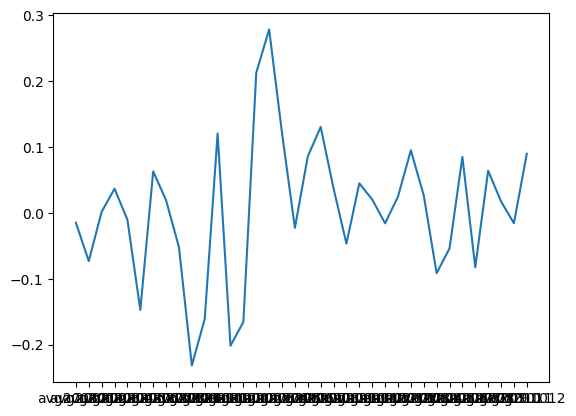

In [6]:
print(df.columns[24:60]) # to verify indices
plt.plot(np.mean(df[df['Industry'] == 'Financials'].iloc[:,24:60],axis=0))

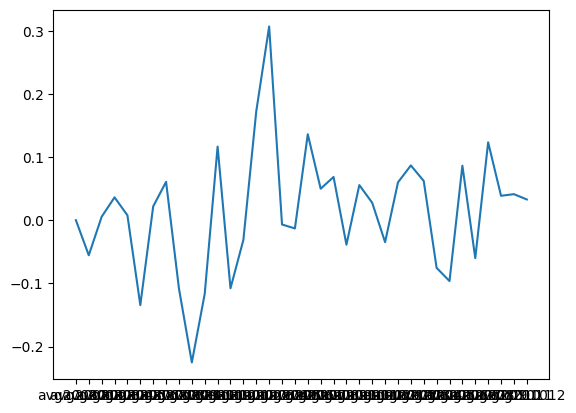

In [7]:
plt.plot(np.mean(df[df['Industry'] == 'Consumer Discretionary'].iloc[:,24:60],axis=0))

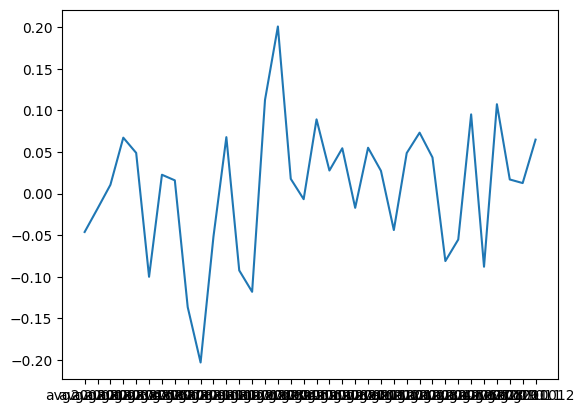

In [8]:
plt.plot(np.mean(df[df['Industry'] == 'Industrials'].iloc[:,24:60],axis=0))

## B.2 k-Means

/opt/homebrew/Caskroom/miniconda/base/envs/mlba/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


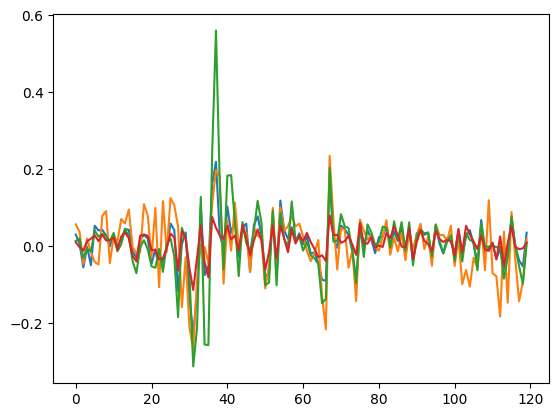

In [9]:
X = df.drop(['symbol','Industry'],axis=1)
clustering = KMeans(n_clusters=4)
clustering.fit(X)
plt.plot(clustering.cluster_centers_.T) # .T takes transpose

/opt/homebrew/Caskroom/miniconda/base/envs/mlba/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/Caskroom/miniconda/base/envs/mlba/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/Caskroom/miniconda/base/envs/mlba/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/Caskroom/miniconda/base/envs/mlba/lib/python3.8/site-packages/

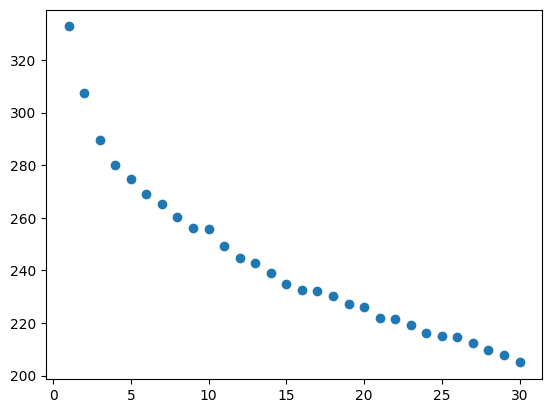

In [10]:
ks = range(1,31)
WCSS = [KMeans(n_clusters=k).fit(X).inertia_ for k in ks]
plt.scatter(ks,WCSS)

In [11]:
clustering = KMeans(n_clusters=6)
clustering.fit(X)

/opt/homebrew/Caskroom/miniconda/base/envs/mlba/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=6)

In [12]:
for i in range(6):
    print(i, np.sum(clustering.labels_ == i))

0 90
1 41
2 161
3 43
4 97
5 1


In [13]:
for i in range(6):
    print(i, df[clustering.labels_ == i]['Industry'].value_counts())

0 Industry
Consumer Discretionary    34
Financials                28
Industrials               17
Materials                  6
Health Care                2
Consumer Staples           2
Information Technology     1
Name: count, dtype: int64
1 Industry
Energy         33
Materials       5
Industrials     3
Name: count, dtype: int64
2 Industry
Health Care                    35
Consumer Staples               27
Utilities                      27
Financials                     20
Industrials                    15
Information Technology         12
Consumer Discretionary         11
Materials                       7
Telecommunications Services     4
Energy                          3
Name: count, dtype: int64
3 Industry
Financials                23
Consumer Discretionary    12
Materials                  4
Industrials                3
Health Care                1
Name: count, dtype: int64
4 Industry
Information Technology         43
Industrials                    17
Consumer Discretionary         

In [12]:
for i in range(6):
    print(np.mean(df['avg200810'][clustering.labels_ == i]))

-0.2674306987945206
-0.3265736997674418
-0.27289813681818187
-0.493296515
-0.18211987809770117
-0.09412159579591838


In [13]:
for i in range(6):
    print(np.mean(df['avg200903'][clustering.labels_ == i]))

0.20943145983561642
0.22735803402325577
0.10666191279545453
0.941171774
0.12643886797126438
0.05905195526530613


## B.3 Spectral Clustering

In [14]:
Similarities = np.corrcoef(X) + 1
print(Similarities.shape)

clustering = SpectralClustering(n_clusters=6, affinity='precomputed')
clustering.fit(Similarities)

(433, 433)


SpectralClustering(affinity='precomputed', n_clusters=6)

In [15]:
for i in range(6):
    print(i, np.sum(clustering.labels_ == i))

0 76
1 27
2 68
3 52
4 77
5 133


In [16]:
for i in range(6):
    print(i, df[clustering.labels_ == i]['Industry'].value_counts())

0 Industry
Financials                28
Consumer Discretionary    20
Industrials               12
Materials                  6
Health Care                4
Consumer Staples           3
Information Technology     3
Name: count, dtype: int64
1 Industry
Utilities                      25
Consumer Staples                1
Telecommunications Services     1
Name: count, dtype: int64
2 Industry
Financials                     32
Industrials                    10
Consumer Discretionary          7
Materials                       6
Consumer Staples                6
Information Technology          3
Health Care                     3
Telecommunications Services     1
Name: count, dtype: int64
3 Industry
Energy              36
Materials            8
Industrials          4
Consumer Staples     2
Utilities            2
Name: count, dtype: int64
4 Industry
Health Care               30
Consumer Staples          15
Financials                10
Information Technology     9
Industrials                7
Cons